##### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

Current:  \\group-data.phys.ethz.ch\hyqu\3 - codes\23-11-10 Filter locking QUA\20231128_v2
error
integration_error
derivative_error
single_shot_DC
offset
single_shot_AC
gain_P
gain_I
timestamps
params_dict


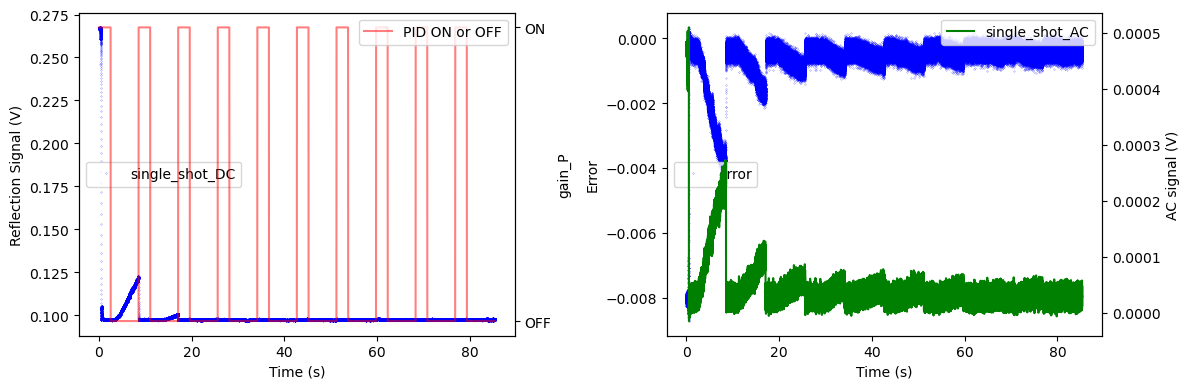

In [88]:
save_folder = 'QuantumMachine_UserCase/Cavity Locking Analysis/'
load_folder = 'QuantumMachine_UserCase/Cavity Locking Data/'
file_ending = '.npz'
#file_name = 'PID_data 2024-01-29 00_31_10.469674'
# file_name = 'PID_monitoring_QUA 2024-03-21 15h06_17Gain_P-1.0e-2_Gain_I0.0e-4_CustomAmp'
file_name = os.listdir(load_folder)[-2]
current_path = os.getcwd()
print('Current: ', current_path)
os.chdir(r'\\group-data.phys.ethz.ch\hyqu\3 - codes\23-11-10 Filter locking QUA\20231128_v2')
#print(os.listdir())


# data = np.load(load_folder+file_name+file_ending,allow_pickle=True)
data = np.load(load_folder+file_name)
lst = data.files
for item in lst:
    print(item)
    #print(data[item])

error = data['error']
offset=data['offset']
singleshot_DC = data['single_shot_DC']
singleshot_AC = data['single_shot_AC']

gain_P = data['gain_P']
gain_I = data['gain_I']
times = data['timestamps']

f,ax=plt.subplots(1,2,figsize=(12,4),layout='tight',sharex=True)
ax[0].plot(times/1e9,singleshot_DC,label='single_shot_DC',color='b', marker='.',linestyle = 'None',markersize=0.3)
ax2=ax[0].twinx()
ax2.plot(times/1e9,gain_P!=0,color='r',alpha=0.5,label='PID ON or OFF')
ax2.set_yticks([0,1])
ax2.set_yticklabels(['OFF','ON'])
ax[0].set_ylabel('Reflection Signal (V)')
ax2.set_ylabel('gain_P')
ax[0].set_xlabel('Time (s)')
ax[0].legend(loc='center left')
ax2.legend(loc='upper right')
# ax[0].set_ylim([0.09,0.11])
# ax[0].set_xlim([8.45,8.55])

ax[1].plot(times/1e9,error,label='error',color='b', marker='.',linestyle = 'None',markersize=0.3)
ax3=ax[1].twinx()
# ax3.plot(times/1e9,offset,color='r',label='offset')
ax3.plot(times/1e9,singleshot_AC,color='g',label='single_shot_AC')

ax[1].set_ylabel('Error')
ax3.set_ylabel('AC signal (V)')
ax[1].set_xlabel('Time (s)')
ax[1].legend(loc='center left')
ax3.legend(loc='upper right')


In [76]:
singleshot_AC[np.argmin(singleshot_DC)]

7.605670576670027e-05

Text(0.5, 1.0, 'Single Shot Reflection Signal FFT')

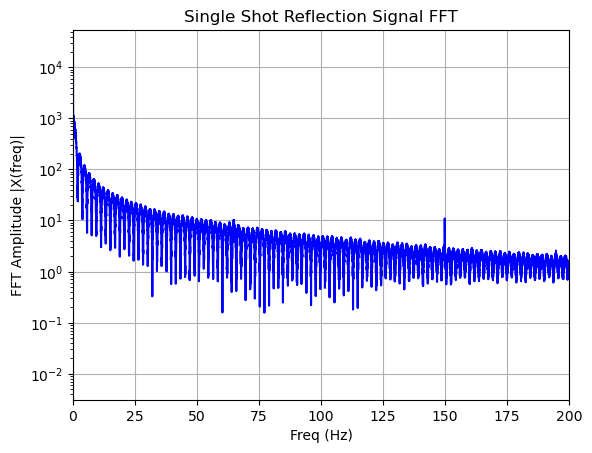

In [84]:
sr=1/np.mean(np.diff(times/1e9))
fft_single_shot_DC = np.fft.fft(singleshot_DC)
N = len(singleshot_DC)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure()
plt.semilogy(freq, np.abs(fft_single_shot_DC), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim([0,200])
plt.grid()
plt.title('Single Shot Reflection Signal FFT')